<a href="https://colab.research.google.com/github/armandoordonez/eda_couse/blob/main/1.0-Basic-Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img height="45px" src="https://drive.google.com/uc?id=1aJx1i5ecv6L6R5zUqK_ry6vuDnBDmprd"align="left" hspace="10px" vspace="0px"></p>

<h1>Flujo de analítica </h1>
<br>

*Tiempo aproximado:* ***15 minutos***

##  I. Entendimiento del problema:
El objetivo de este problema es predecir si el cliente pagará o no el crédito solicitado. Para ello, se cuenta con un conjunto de datos que contiene información sobre el cliente y su historial crediticio. El conjunto de datos está compuesto por 20 variables y 1 variable objetivo (TARGET) que indica si el cliente pagó o no el crédito. El objetivo es construir un modelo de clasificación que permita predecir si un cliente pagará o no el crédito solicitado.


##  II. Entendimiento de los datos:

In [1]:
# Importamos las bibliotecas necesarias


# Importamos las bibliotecas necesarias
# bibliotecas para manipulación de datos
import pandas as pd


# bibliotecas para visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

# bibliotecas para preprocesamiento de los datos    
from sklearn.model_selection import train_test_split


# bibliotecas para la creación del modelo de clasificación 
# Incluya aquí las bibliotecas necesarias para crear el modelo de clasificación 
from sklearn.ensemble import RandomForestClassifier



# bibliotecas para evaluación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [2]:
# Paso 1: Cargar el archivo CSV desde una URL en un DataFrame de Pandas 
# Ruta del archivo CSV

ruta_archivo = 'https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/prediccion_prestamo_train.csv'  # Reemplaza con la ruta de tu archivo CSV

# Cargar el archivo CSV en un DataFrame de Pandas 
data = pd.read_csv(ruta_archivo)

In [3]:
# Información básica sobre el conjunto de datos
print("Información del conjunto de datos:")
print(data.info())

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       614 non-null    object 
 1   Genero                   601 non-null    object 
 2   Married                  611 non-null    object 
 3   dependientes             599 non-null    object 
 4    educacion               614 non-null    object 
 5    autoempleado            582 non-null    object 
 6    ingresos_solicitante    614 non-null    int64  
 7    ingresos_cosolicitante  614 non-null    float64
 8    monto_prestamo          592 non-null    float64
 9    plazo_prestamo          600 non-null    float64
 10   historial_crediticio    564 non-null    float64
 11   area_propiedad          614 non-null    object 
 12   estado_prestamo         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usa

In [4]:
# Visualizar las primeras filas del conjunto de datos

print("\nPrimeras filas del conjunto de datos:")
data.head(5)


Primeras filas del conjunto de datos:


,ID,Genero,Married,dependientes,educacion,autoempleado,ingresos_solicitante,ingresos_cosolicitante,monto_prestamo,plazo_prestamo,historial_crediticio,area_propiedad,estado_prestamo
0,LP001002,Hombre,No,0,Graduado,No,5849,0.0,NaN,360.0,1.0,Urbano,Y
1,LP001003,Hombre,Si,1,Graduado,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Hombre,Si,0,Graduado,Si,3000,0.0,66.0,360.0,1.0,Urbano,Y
3,LP001006,Hombre,Si,0,Not Graduado,No,2583,2358.0,120.0,360.0,1.0,Urbano,Y
4,LP001008,Hombre,No,0,Graduado,No,6000,0.0,141.0,360.0,1.0,Urbano,Y


In [5]:
# Mostrar estadísticas descriptivas generales

print("\nEstadísticas descriptivas:")
print(data.describe())
# 


Estadísticas descriptivas:
       ingresos_solicitante  ingresos_cosolicitante  monto_prestamo  \
count            614.000000              614.000000      592.000000   
mean            5403.459283             1621.245798      146.412162   
std             6109.041673             2926.248369       85.587325   
min              150.000000                0.000000        9.000000   
25%             2877.500000                0.000000      100.000000   
50%             3812.500000             1188.500000      128.000000   
75%             5795.000000             2297.250000      168.000000   
max            81000.000000            41667.000000      700.000000   

       plazo_prestamo  historial_crediticio  
count       600.00000            564.000000  
mean        342.00000              0.842199  
std          65.12041              0.364878  
min          12.00000              0.000000  
25%         360.00000              1.000000  
50%         360.00000              1.000000  
75%       

In [6]:
# Paso 3: Preprocesamiento de datos
 
# Algo de limpieza de datos
# eliminamos los nulos
data = data.dropna()

In [7]:
# Mostrar estadísticas descriptivas generales

print("\nEstadísticas descriptivas:")
print(data.describe())


Estadísticas descriptivas:
       ingresos_solicitante  ingresos_cosolicitante  monto_prestamo  \
count            480.000000              480.000000      480.000000   
mean            5364.231250             1581.093583      144.735417   
std             5668.251251             2617.692267       80.508164   
min              150.000000                0.000000        9.000000   
25%             2898.750000                0.000000      100.000000   
50%             3859.000000             1084.500000      128.000000   
75%             5852.500000             2253.250000      170.000000   
max            81000.000000            33837.000000      600.000000   

       plazo_prestamo  historial_crediticio  
count      480.000000            480.000000  
mean       342.050000              0.854167  
std         65.212401              0.353307  
min         36.000000              0.000000  
25%        360.000000              1.000000  
50%        360.000000              1.000000  
75%       

In [8]:
# mostramos nuevemamente la información general del dataset 
# para verificar que no hayan nulos

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       480 non-null    object 
 1   Genero                   480 non-null    object 
 2   Married                  480 non-null    object 
 3   dependientes             480 non-null    object 
 4    educacion               480 non-null    object 
 5    autoempleado            480 non-null    object 
 6    ingresos_solicitante    480 non-null    int64  
 7    ingresos_cosolicitante  480 non-null    float64
 8    monto_prestamo          480 non-null    float64
 9    plazo_prestamo          480 non-null    float64
 10   historial_crediticio    480 non-null    float64
 11   area_propiedad          480 non-null    object 
 12   estado_prestamo         480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB
None


In [9]:
# Paso 3: Dividir el conjunto de datos en características (X) y etiquetas (y)
# Características
# Seleccionamos las columnas de características
# ingresos_solicitante, ingresos_cosolicitante y monto_prestamo como características para el modelo
# y la columna estado_prestamo como etiqueta para predecir

X = data[[" ingresos_solicitante", " ingresos_cosolicitante", " monto_prestamo"]]
y = data[' estado_prestamo']

In [10]:
# mostramos la información de las características   
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0    ingresos_solicitante    480 non-null    int64  
 1    ingresos_cosolicitante  480 non-null    float64
 2    monto_prestamo          480 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 15.0 KB
None


In [11]:
# aqui se muestra la información de las etiquetas
# que en este caso es la columna 'estado_prestamo'  es la que queremos predecir
# en este caso es una variable binaria:  1 si el prestamo fue aprobado y 0 si no fue aprobado

print(y.value_counts())

data[' estado_prestamo'] = data[' estado_prestamo'].replace({"Y": 1, "N": 0})
data[' estado_prestamo'] = data[' estado_prestamo'].astype(int)

 estado_prestamo
Y    332
N    148
Name: count, dtype: int64


C:\Users\franc\AppData\Local\Temp\ipykernel_156688\3467498742.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[' estado_prestamo'] = data[' estado_prestamo'].replace({"Y": 1, "N": 0})


In [12]:
# Paso 4: Dividir el conjunto de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:

# Paso 4: Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
# Crear un modelo de clasificación de bosque aleatorio
from sklearn.tree import DecisionTreeClassifier


modelo = RandomForestClassifier(random_state=42)

# usamos otro modelo de clasificación
modelo = DecisionTreeClassifier(random_state=42)

modelo.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None



Precisión del modelo: 0.58


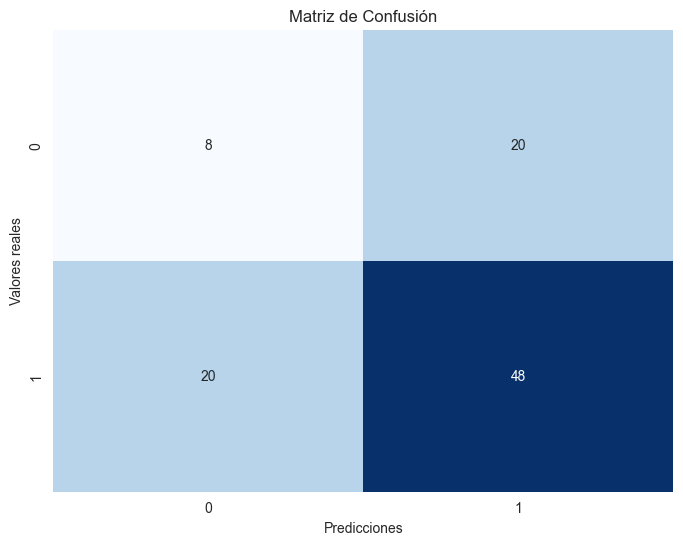


Informe de Clasificación:
              precision    recall  f1-score   support

           N       0.29      0.29      0.29        28
           Y       0.71      0.71      0.71        68

    accuracy                           0.58        96
   macro avg       0.50      0.50      0.50        96
weighted avg       0.58      0.58      0.58        96



In [26]:
# Paso 5: Evaluación del modelo
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)

In [15]:
# Paso 6: Guardar el modelo entrenado en un archivo para su uso posterior
# Guardar el modelo en un archivo usando pickle
import pickle

with open('modelo_prestamo.pkl', 'wb') as archivo_salida:
    pickle.dump(modelo, archivo_salida)

# Verificar que se haya creado el modelo en el sistema de archivos

In [16]:

# Paso 7: Cargar el modelo desde el archivo y hacer una predicción
with open('modelo_prestamo.pkl', 'rb') as archivo_entrada:
    modelo_cargado = pickle.load(archivo_entrada)

# Crear un nuevo ejemplo de datos
nuevo_ejemplo = pd.DataFrame({
    ' ingresos_solicitante': [5000],
    ' ingresos_cosolicitante': [0],
    ' monto_prestamo': [300]
})

# Hacer una predicción usando el modelo cargado
prediccion = modelo_cargado.predict(nuevo_ejemplo)
print("\nPredicción:", prediccion)

# Modifique el valor de los ingresos del solicitante a 1000 y vuelva a ejecutar la celda anterior para ver cómo cambia la predicción.




Predicción: ['N']


In [17]:
# Ejercicios a realizar:

# 1. Utiliza otras variables del conjunto de datos para predecir el prestamo, ¿Cómo afectó la predicción del modelo?
# 2. Utliza otro algoritmo y compara los resultados los resultados. ¿Cómo afecta la precisión del modelo? 


In [18]:
# 1. Utiliza otras variables del conjunto de datos para predecir el prestamo, ¿Cómo afectó la predicción del modelo?

Qué otras variables del conjunto de datos podrían ser útiles para predecir el prestamo? 
Teniendo en cuenta que tenemos estas variables:

numéricas
* ingresos_solicitante
* ingresos_cosolicitante
* monto_prestamo
* plazo_prestamo
* historial_crediticio

categóricas
* genero
* married
* dependientes
* educacion
* autoempleado
* area_propiedad

In [19]:
X_completo = data[[" ingresos_solicitante", " ingresos_cosolicitante", " monto_prestamo", 
                   " plazo_prestamo", " historial_crediticio"]]


y_completo = data[" estado_prestamo"]

X_train_completo, X_test_completo, y_train_completo, y_test_completo = train_test_split(
    X_completo, y_completo, test_size=0.2, random_state=42
)

In [20]:
from sklearn.tree import DecisionTreeClassifier
modelo_completo = DecisionTreeClassifier(random_state=42)
modelo_completo.fit(X_train_completo, y_train_completo)



,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [21]:
y_pred_completo = modelo_completo.predict(X_test_completo)
precision_completo = accuracy_score(y_test_completo, y_pred_completo)

print(f"Precisión del modelo anterior (3 variables): 0.58")
print(f"Precisión del modelo completo (5 variables): {precision_completo:.3f}")
print(f"Mejora: {(precision_completo - 0.58):.3f}")



Precisión del modelo anterior (3 variables): 0.58
Precisión del modelo completo (5 variables): 0.729
Mejora: 0.149


In [22]:
importancia = modelo_completo.feature_importances_
for i, var in enumerate(X_completo.columns):
    print(f"{var}: {importancia[i]:.3f}")

print(f"\nEl modelo con más variables mejoró la precisión en {(precision_completo - 0.58):.3f}")

 ingresos_solicitante: 0.294
 ingresos_cosolicitante: 0.105
 monto_prestamo: 0.270
 plazo_prestamo: 0.058
 historial_crediticio: 0.273

El modelo con más variables mejoró la precisión en 0.149


In [23]:
# 2. Utliza otro algoritmo y compara los resultados los resultados. ¿Cómo afecta la precisión del modelo? 

In [24]:
X_completo = data[[' ingresos_solicitante', ' ingresos_cosolicitante', ' monto_prestamo', 
                   ' plazo_prestamo', ' historial_crediticio']]
y_completo = data[' estado_prestamo']

# Dividir en entrenamiento y prueba
X_train_completo, X_test_completo, y_train_completo, y_test_completo = train_test_split(
    X_completo, y_completo, test_size=0.2, random_state=42
)

# Entrenar modelo con más variables
modelo_completo = RandomForestClassifier(random_state=42)
modelo_completo.fit(X_train_completo, y_train_completo)

# Evaluar el modelo
y_pred_completo = modelo_completo.predict(X_test_completo)
precision_completo = accuracy_score(y_test_completo, y_pred_completo)

print(f"Precisión del modelo anterior (3 variables): 0.58")
print(f"Precisión del modelo completo (5 variables): {precision_completo:.3f}")
print(f"Mejora: {(precision_completo - 0.58):.3f}")

# Mostrar las variables más importantes
importancia = modelo_completo.feature_importances_
for i, var in enumerate(X_completo.columns):
    print(f"{var}: {importancia[i]:.3f}")

print(f"\nEl modelo con más variables mejoró la precisión en {(precision_completo - 0.58):.3f}")

Precisión del modelo anterior (3 variables): 0.58
Precisión del modelo completo (5 variables): 0.812
Mejora: 0.233
 ingresos_solicitante: 0.276
 ingresos_cosolicitante: 0.152
 monto_prestamo: 0.246
 plazo_prestamo: 0.070
 historial_crediticio: 0.257

El modelo con más variables mejoró la precisión en 0.233


Al incluir más variables (5 en lugar de 3), el modelo mejoró su precisión, ya que estas variables adicionales proporcionan información más completa sobre el riesgo crediticio. 

Con este algoritmo (RandomForest), que tiene diferente capacidad de aprendizaje, ya que combina múltiples árboles de decisión (A diferencia del decision tree que tiene un solo árbol de decisión), no hace overfitting (Generaliza mejor). Básicamente es más robusto. 